# **Prediction of Student Performances from Game Play.**

### The objective aims to predict the performance of students while playing an educational game. The data available to train a model is a large game log. We need to predict whether each student answered each question correctly, which involves binary classification for each question in each student session.
---



**Files:**

***train.csv*** - the training set

***test.csv*** - the test set

***sample_submission.csv*** - a sample submission file in the correct format

***train_labels.csv*** - correct value for all 18 questions for each session in the training set.



---


**Columns:**

***session_id*** - the ID of the session the event took place in

***index*** - the index of the event for the session

***elapsed_time*** - how much time has passed (in milliseconds) between 
the start of the session and when the event was recorded

***event_name*** - the name of the event type

***name*** - the event name (e.g. identifies whether a notebook_click is is opening or closing the notebook)

***level*** - what level of the game the event occurred in (0 to 22)

***page*** - the page number of the event (only for notebook-related events)

***room_coor_x*** - the coordinates of the click in reference to the in-game room (only for click events)

***room_coor_y*** - the coordinates of the click in reference to the in-game room (only for click events)

***screen_coor_x*** - the coordinates of the click in reference to the player’s screen (only for click events)

***screen_coor_y*** - the coordinates of the click in reference to the player’s screen (only for click events)

***hover_duration*** - how long (in milliseconds) the hover happened for (only for hover events)

***text*** - the text the player sees during this event

***fqid*** - the fully qualified ID of the event

***room_fqid*** - the fully qualified ID of the room the event took place in.

***text_fqid*** - the fully qualified ID.

***fullscreen*** - whether the player is in fullscreen mode

***hq*** - whether the game is in high-quality

***music***- whether the game music is on or off

***level_group*** - which group of levels - and group of questions - this row belongs to (0-4, 5-12, 13-22)

## **Import the libraries :**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

In [2]:
import os

## **Load the data :**

In [3]:
DIR_ROOT = '../../data/predict-student-performance-from-game-play/'

path_train = os.path.join(DIR_ROOT, "train.csv")
path_train_labels = os.path.join(DIR_ROOT, "train_labels.csv")
path_test = os.path.join(DIR_ROOT, "test.csv")
path_submission = os.path.join(DIR_ROOT, "sample_submission.csv")

In [4]:
df_train = pd.read_csv(path_train)
df_test = pd.read_csv(path_test)
df_labels = pd.read_csv(path_train_labels)
df_submission = pd.read_csv(path_submission)

## **Basic Investigation :**

In [5]:
print(f"Train: (num_rows, num_cols): {df_train.shape}")
print(f"Test: (num_rows, num_cols): {df_test.shape}")

df_train.head()

Train: (num_rows, num_cols): (13174211, 20)
Test: (num_rows, num_cols): (3728, 21)


,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group
0,20090312431273200,0,0,cutscene_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,undefined,intro,tunic.historicalsociety.closet,tunic.historicalsociety.closet.intro,NaN,NaN,NaN,0-4
1,20090312431273200,1,1323,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,"Whatcha doing over there, Jo?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,NaN,NaN,NaN,0-4
2,20090312431273200,2,831,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,Just talking to Teddy.,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,NaN,NaN,NaN,0-4
3,20090312431273200,3,1147,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,I gotta run to my meeting!,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,NaN,NaN,NaN,0-4
4,20090312431273200,4,1863,person_click,basic,0,NaN,-412.991405,-159.314686,381.0,494.0,NaN,"Can I come, Gramps?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,NaN,NaN,NaN,0-4


In [36]:
df_labels.head()

df_labels['session_id_num'] = df_labels['session_id'].apply(lambda x: int(x.split('_')[0]))
df_labels['question_num'] = df_labels['session_id'].apply(lambda x: x.split('_')[-1])

df_labels.head()

,session_id,correct,session_id_num,question_num
0,20090312431273200_q1,1,20090312431273200,q1
1,20090312433251036_q1,0,20090312433251036,q1
2,20090314121766812_q1,1,20090314121766812,q1
3,20090314363702160_q1,1,20090314363702160,q1
4,20090314441803444_q1,1,20090314441803444,q1


In [6]:
df_train.dtypes

session_id          int64
index               int64
elapsed_time        int64
event_name         object
name               object
level               int64
page              float64
room_coor_x       float64
room_coor_y       float64
screen_coor_x     float64
screen_coor_y     float64
hover_duration    float64
text               object
fqid               object
room_fqid          object
text_fqid          object
fullscreen        float64
hq                float64
music             float64
level_group        object
dtype: object

In [7]:
list_uniq_sessions = list(df_train['session_id'].unique())

len(list_uniq_sessions)


11779

In [18]:
session_id = list_uniq_sessions[10]

print(f"Working with session_id: {session_id}")
df_session = df_train[df_train['session_id'] == session_id]

df_session

Working with session_id: 20090317111400710


,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group
11526,20090317111400710,0,0,cutscene_click,basic,0,NaN,-409.991405,-119.314686,384.0,454.0,NaN,undefined,intro,tunic.historicalsociety.closet,tunic.historicalsociety.closet.intro,NaN,NaN,NaN,0-4
11527,20090317111400710,1,2103,person_click,basic,0,NaN,-450.991405,25.685314,343.0,309.0,NaN,"Whatcha doing over there, Jo?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,NaN,NaN,NaN,0-4
11528,20090317111400710,2,4592,person_click,basic,0,NaN,15.008595,-59.314686,809.0,394.0,NaN,Just talking to Teddy.,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,NaN,NaN,NaN,0-4
11529,20090317111400710,3,7262,person_click,basic,0,NaN,-435.991405,56.685314,358.0,278.0,NaN,I gotta run to my meeting!,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,NaN,NaN,NaN,0-4
11530,20090317111400710,4,11653,person_click,basic,0,NaN,-433.991405,72.685314,360.0,262.0,NaN,"Can I come, Gramps?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,NaN,NaN,NaN,0-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12810,20090317111400710,1325,5458089,map_hover,basic,22,NaN,NaN,NaN,NaN,NaN,413.0,NaN,tunic.library,tunic.historicalsociety.entry,NaN,NaN,NaN,NaN,13-22
12811,20090317111400710,1326,5458123,map_hover,basic,22,NaN,NaN,NaN,NaN,NaN,17.0,NaN,tunic.capitol_2,tunic.historicalsociety.entry,NaN,NaN,NaN,NaN,13-22
12812,20090317111400710,1327,5459112,map_click,undefined,22,NaN,495.180582,-59.311500,464.0,366.0,NaN,NaN,tunic.capitol_2,tunic.historicalsociety.entry,NaN,NaN,NaN,NaN,13-22
12813,20090317111400710,1328,5460754,navigate_click,undefined,22,NaN,280.250927,-26.935337,441.0,315.0,NaN,NaN,chap4_finale_c,tunic.capitol_2.hall,NaN,NaN,NaN,NaN,13-22


In [22]:
df_session['event_name'].value_counts().to_dict()

{'navigate_click': 559,
 'person_click': 246,
 'object_click': 122,
 'cutscene_click': 102,
 'map_hover': 97,
 'object_hover': 63,
 'notification_click': 31,
 'map_click': 28,
 'notebook_click': 21,
 'observation_click': 17,
 'checkpoint': 3}

In [23]:
df_session['level_group'].value_counts().to_dict()

{'5-12': 535, '13-22': 516, '0-4': 238}

In [20]:
def get_level_in_session(df_sess, lvl_grp):
    return df_sess[df_sess['level_group'] == lvl_grp]


In [25]:
df_sess_04 = get_level_in_session(df_session, "0-4")
display(df_sess_04['event_name'].value_counts().to_dict())
display(df_sess_04['level_group'].value_counts().to_dict())

{'navigate_click': 124,
 'object_click': 30,
 'cutscene_click': 29,
 'person_click': 22,
 'notification_click': 11,
 'object_hover': 9,
 'observation_click': 7,
 'map_hover': 3,
 'map_click': 2,
 'checkpoint': 1}

{'0-4': 238}

In [26]:
df_sess_512 = get_level_in_session(df_session, "5-12")
display(df_sess_512['event_name'].value_counts().to_dict())
display(df_sess_512['level_group'].value_counts().to_dict())

{'navigate_click': 203,
 'person_click': 108,
 'object_click': 74,
 'map_hover': 46,
 'object_hover': 36,
 'map_click': 18,
 'cutscene_click': 16,
 'notebook_click': 16,
 'notification_click': 12,
 'observation_click': 5,
 'checkpoint': 1}

{'5-12': 535}

In [27]:
df_sess_1322 = get_level_in_session(df_session, "13-22")
display(df_sess_1322['event_name'].value_counts().to_dict())
display(df_sess_1322['level_group'].value_counts().to_dict())

{'navigate_click': 232,
 'person_click': 116,
 'cutscene_click': 57,
 'map_hover': 48,
 'object_click': 18,
 'object_hover': 18,
 'map_click': 8,
 'notification_click': 8,
 'observation_click': 5,
 'notebook_click': 5,
 'checkpoint': 1}

{'13-22': 516}

In [28]:
sum(df_sess_1322['event_name'].value_counts().to_dict().values())

516

In [29]:
df_sess_checkpoints = df_session[df_session['event_name'] == "checkpoint"]

df_sess_checkpoints.head()

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group
11763,20090317111400710,237,825037,checkpoint,basic,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chap1_finale_c,tunic.capitol_0.hall,NaN,NaN,NaN,NaN,0-4
12298,20090317111400710,779,3472382,checkpoint,basic,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chap2_finale_c,tunic.capitol_1.hall,NaN,NaN,NaN,NaN,5-12
12814,20090317111400710,1329,5462736,checkpoint,basic,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chap4_finale_c,tunic.capitol_2.hall,NaN,NaN,NaN,NaN,13-22


In [38]:
df_sess_labels = df_labels[df_labels['session_id_num'] == session_id]
display(df_sess_labels)


dict_q_correct = df_sess_labels.set_index('question_num').to_dict()['correct']
display(dict_q_correct)



,session_id,correct,session_id_num,question_num
10,20090317111400710_q1,1,20090317111400710,q1
11789,20090317111400710_q2,1,20090317111400710,q2
23568,20090317111400710_q3,1,20090317111400710,q3
35347,20090317111400710_q4,1,20090317111400710,q4
47126,20090317111400710_q5,0,20090317111400710,q5
58905,20090317111400710_q6,0,20090317111400710,q6
70684,20090317111400710_q7,1,20090317111400710,q7
82463,20090317111400710_q8,0,20090317111400710,q8
94242,20090317111400710_q9,0,20090317111400710,q9
106021,20090317111400710_q10,0,20090317111400710,q10


{'q1': 1,
 'q2': 1,
 'q3': 1,
 'q4': 1,
 'q5': 0,
 'q6': 0,
 'q7': 1,
 'q8': 0,
 'q9': 0,
 'q10': 0,
 'q11': 1,
 'q12': 1,
 'q13': 1,
 'q14': 1,
 'q15': 1,
 'q16': 0,
 'q17': 1,
 'q18': 1}

## visualizations

In [9]:
def plot_elapsed_time_series(df_session):
    level_groups = list(df_session['level_group'].unique())
    list_colors = ['blue', 'red', 'green', 'orange']
    for lg in level_groups:
        df_temp = df_session[df_session['level_group'] == lg]
        plt.scatter(df_temp['index'], df_temp['elapsed_time'], label=lg)
    plt.legend()
    plt.xlabel("event number")
    plt.ylabel("time (ms)")
    plt.title("Event plot")
    plt.show()

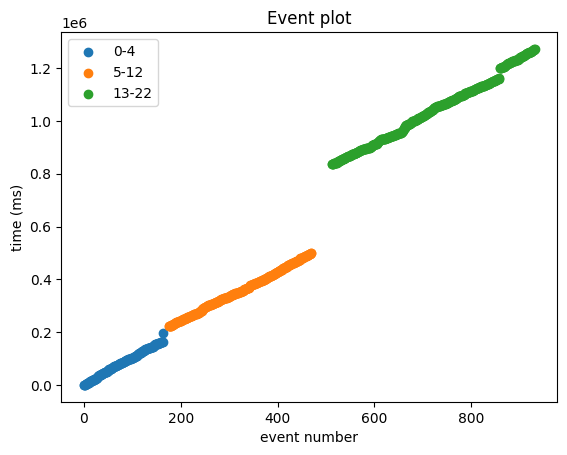

In [10]:
plot_elapsed_time_series(df_session)

In [17]:
def plot_elapsed_time_series_2(df_s):
    df_sess = df_s[~df_s['event_name'].str.contains('click')]
    print(df_s.shape, df_sess.shape)
    level_groups = list(df_sess['level_group'].unique())
    list_colors = ['blue', 'red', 'green', 'orange']
    for lg in level_groups:
        df_temp = df_sess[df_sess['level_group'] == lg]
        plt.scatter(df_temp['index'], df_temp['elapsed_time'], label=lg)
    plt.legend()
    plt.show()

(881, 20) (68, 20)


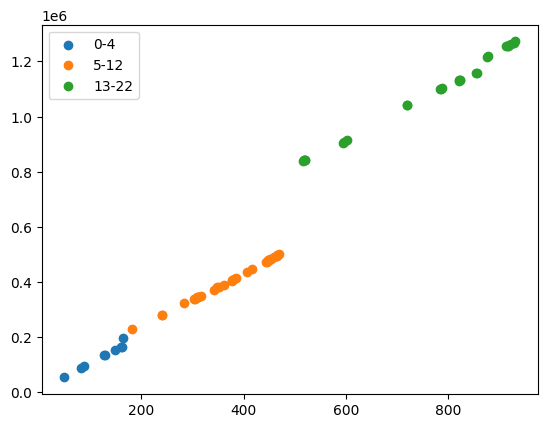

In [18]:
plot_elapsed_time_series_2(df_session)

In [35]:
df_labels_session = df_labels[df_labels['session_id'].str.contains(f"{session_id}")]

df_labels_session

,session_id,correct,question
0,20090312431273200_q1,1,1
11779,20090312431273200_q2,1,2
23558,20090312431273200_q3,1,3
35337,20090312431273200_q4,1,4
47116,20090312431273200_q5,1,5
58895,20090312431273200_q6,1,6
70674,20090312431273200_q7,1,7
82453,20090312431273200_q8,1,8
94232,20090312431273200_q9,1,9
106011,20090312431273200_q10,1,10


## **Missing Values :**

In [8]:
def plot_missing_values(df_train, df_test):

    train_missing_ratios = df_train.isna().sum() / len(df_train)
    test_missing_ratios = df_test.isna().sum() / len(df_test)

    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    plt.bar(train_missing_ratios.index,
            train_missing_ratios.values,
            color=['blue' if ratio == 1 else 'magenta' for ratio in train_missing_ratios.values])
    
    plt.xlabel('Feature', fontsize=12)
    plt.ylabel('Missing values ratio', fontsize=12)
    plt.title('Missing values in TRAIN SET', fontsize=16)
    plt.xticks(rotation=90)
    plt.legend(handles=[mpatches.Patch(color='magenta'),
                        mpatches.Patch(color='blue')], 
               labels=['Partially missing values', 'Completely missing values'])

    plt.subplot(1, 2, 2)
    plt.bar(test_missing_ratios.index,
            test_missing_ratios.values,
            color=['blue' if ratio == 1 else 'magenta' for ratio in test_missing_ratios.values])
    plt.title('Missing values in TEST SET', fontsize=16)
    plt.xticks(rotation=90)

    plt.tight_layout()
    plt.show()

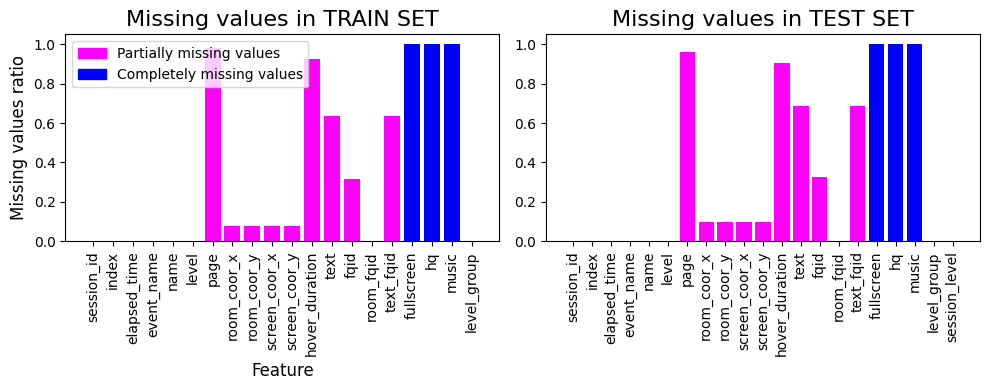

In [9]:
plot_missing_values(df_train, df_test)

## **Exploratory Data Analysis :**


In [11]:
print("The longest session  of the training set lasted about",
      int(df_train['elapsed_time'].max() / 8.64e7), "days.")
print("The longest session of the testing set lasted about",
      int(df_test['elapsed_time'].max() / 1000), "sec.")

The longest session  of the training set lasted about 20 days.
The longest session of the testing set lasted about 6524 sec.


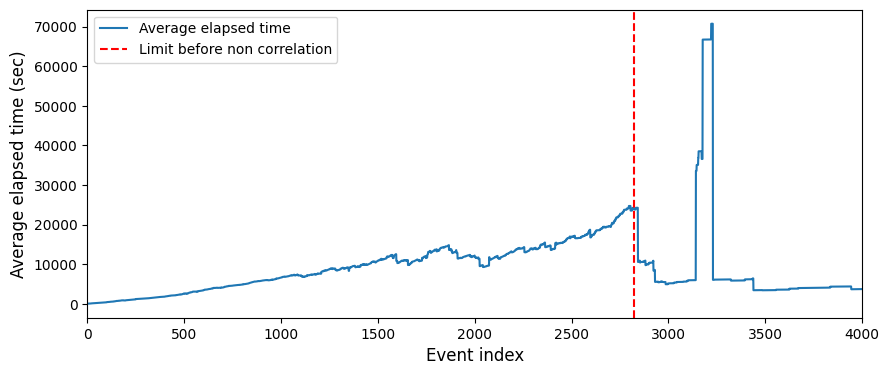

In [12]:
avg_elapsed_time = df_train.groupby('index')['elapsed_time'].mean() / 1000

plt.figure(figsize=(10, 4))
plt.plot(avg_elapsed_time)
plt.axvline(2825, color='red', ls='--')
plt.xlabel("Event index", fontsize=12)
plt.ylabel("Average elapsed time (sec)", fontsize=12)
plt.xlim([0, 4000])
plt.legend(['Average elapsed time', 'Limit before non correlation'])

plt.show()

In [29]:
def plot_event_frequencies(df_train):
    event_names = df_train['event_name'].value_counts()
    names = df_train['name'].value_counts()

    print("Number of event names:", len(event_names))
    print("Number of names:", len(names))

    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    plt.bar(event_names.index, event_names.values, color='orange')
    plt.ylabel("Occurence counts", fontsize=12)
    plt.title("Frequency of the 'event names'", fontsize=12)
    plt.xticks(rotation=70)

    plt.subplot(1, 2, 2)
    plt.bar(names.index, names.values, color='brown')
    plt.title("Frequency of the 'names'", fontsize=12)
    plt.xticks(rotation=70)

Number of event names: 11
Number of names: 6


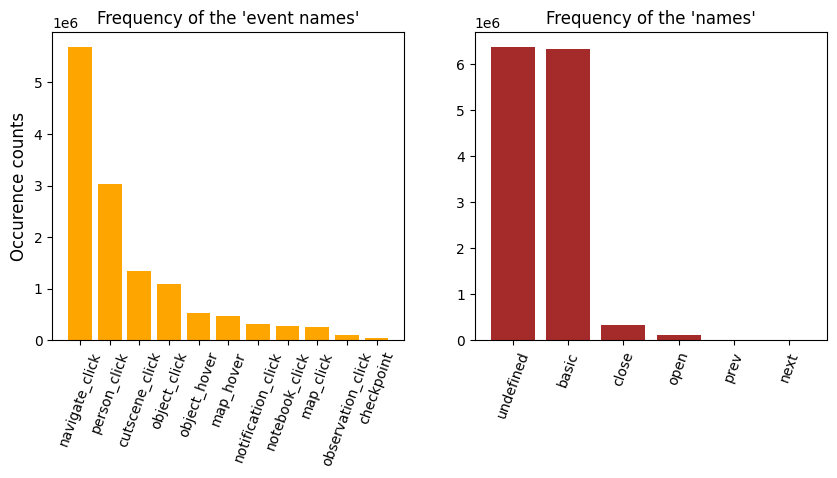

In [30]:
plot_event_frequencies(df_train)

<Figure size 640x480 with 0 Axes>

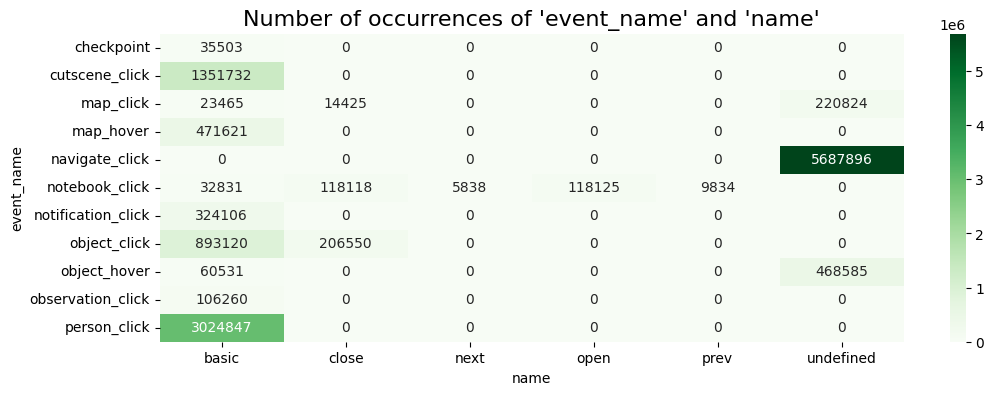

In [15]:
plt.tight_layout()
plt.show()

# Pivot table
pivot_table = df_train.pivot_table(index='event_name', columns='name', aggfunc='size')
pivot_table = pivot_table.fillna(0).astype(int)
plt.figure(figsize=(12, 4))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='Greens')
plt.title("Number of occurrences of 'event_name' and 'name'", fontsize=16)
plt.show()

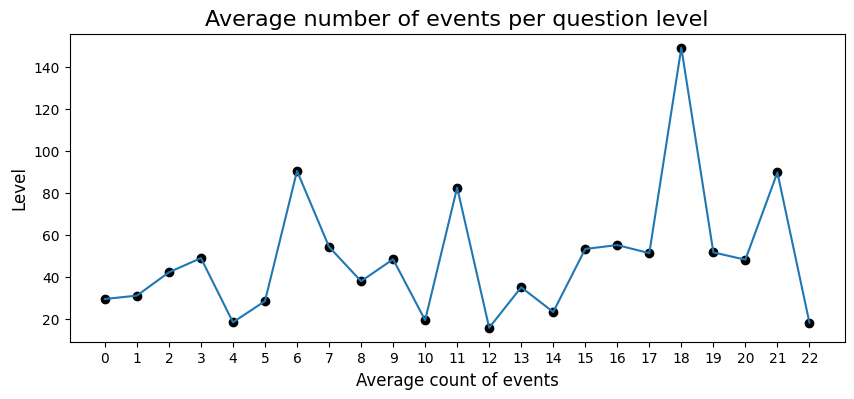

In [16]:
grouped_df = df_train.groupby(['session_id', 'level'])\
    ['index'].count().reset_index()
grouped_df.columns = ['session_id', 'level', 'index_count']
mean_counts = grouped_df.groupby('level').mean().drop('session_id', axis=1)
mean_counts

xrange = range(0, 23)
plt.figure(figsize=(10, 4))
plt.plot(mean_counts)
plt.scatter(xrange, mean_counts, color='black')
plt.title("Average number of events per question level", fontsize=16)
plt.xlabel("Average count of events", fontsize=12)
plt.ylabel("Level", fontsize=12)
plt.xticks(xrange)
plt.show()

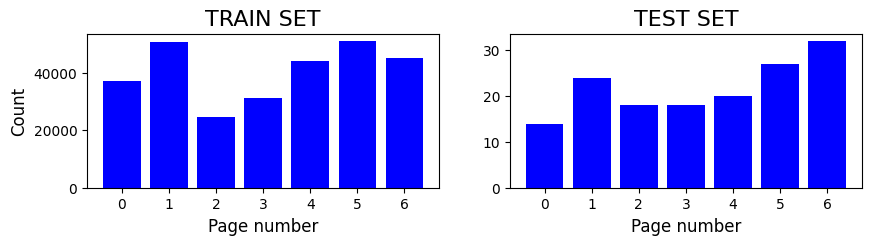

In [17]:
train_page_number_counts = df_train['page'].value_counts().sort_index()
test_page_number_counts = df_test['page'].value_counts().sort_index()
plt.figure(figsize=(10, 2))

plt.subplot(1, 2, 1)
plt.bar(range(0, 7), train_page_number_counts, color='blue')
plt.xlabel("Page number", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("TRAIN SET",
          fontsize=16)

plt.subplot(1, 2, 2)
plt.bar(range(0, 7), test_page_number_counts, color='blue')
plt.xlabel("Page number", fontsize=12)
plt.title("TEST SET",
          fontsize=16)

plt.show()

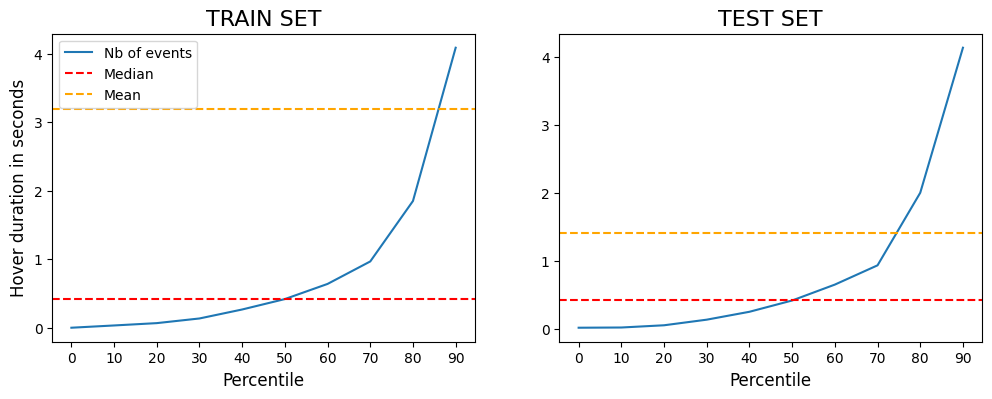

In [18]:
train_hover = df_train['hover_duration'].dropna() / 1000
test_hover = df_test['hover_duration'].dropna() / 1000
xrange = range(0, 100, 10)
train_percentiles , test_percentiles = [], []
for q in xrange:
    train_perc = np.percentile(train_hover, q)
    test_perc = np.percentile(test_hover, q)
    train_percentiles.append(train_perc)
    test_percentiles.append(test_perc)
    
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(xrange, train_percentiles)
plt.axhline(train_hover.median(), color='red', ls='--')
plt.axhline(train_hover.mean(), color='orange', ls='--')
plt.xticks(xrange)
plt.yticks(range(0, 5))
plt.legend(['Nb of events', 'Median', 'Mean'])
plt.xlabel("Percentile", fontsize=12)
plt.ylabel("Hover duration in seconds", fontsize=12)
plt.title("TRAIN SET", fontsize=16)
plt.subplot(1, 2, 2)
plt.plot(xrange, test_percentiles)
plt.axhline(test_hover.median(), color='red', ls='--')
plt.axhline(test_hover.mean(), color='orange', ls='--')
plt.xticks(xrange)
plt.xlabel("Percentile", fontsize=12)
plt.title("TEST SET", fontsize=16)
plt.show()

In [19]:
train_texts = df_train['text'].dropna().value_counts()
test_texts = df_test['text'].dropna().value_counts()
print("TRAIN | nb of unique texts:", len(train_texts))
print('-' * 60)
print(train_texts, '\n')
print("TEST | nb of unique texts:", len(test_texts))
print('-' * 60)
print(test_texts, '\n')

TRAIN | nb of unique texts: 594
------------------------------------------------------------
undefined                                           178294
\u00f0\u0178\u02dc\u0090                             24383
Hey!                                                 23724
I should go to the Capitol and tell Mrs. M!          20074
This is perfect for the exhibit.                     19987
                                                     ...  
Sorry for the delay, Boss.                               1
And where's your grampa?                                 1
Who is Teddy?                                            1
AND I know who took Teddy!                               1
Meet me back in my office and we'll get started!         1
Name: text, Length: 594, dtype: int64 

TEST | nb of unique texts: 495
------------------------------------------------------------
undefined                                     27
You can talk to a textile expert there.        7
Hey!                        

In [20]:
train_fqids = df_train['fqid'].value_counts()
train_room_fqids = df_train['room_fqid'].value_counts()
train_text_fqids = df_train['text_fqid'].value_counts()
test_fqids = df_test['fqid'].value_counts()
test_room_fqids = df_test['room_fqid'].value_counts()
test_text_fqids = df_test['text_fqid'].value_counts()
train_fqid_bundle = [train_fqids, train_room_fqids, train_text_fqids]
test_fqid_bundle = [test_fqids, test_room_fqids, test_text_fqids]
fqid_labels = ["fqid", "room_fqid", "text_fqid"]

In [21]:
def print_fqids(set_name, bundle):
    for label, value in zip(fqid_labels, bundle):
        print('-' * 60)
        print(set_name, label)
        print('-' * 60)
        print(value)  
print_fqids('TRAIN', train_fqid_bundle)
print_fqids('TEST', test_fqid_bundle)


------------------------------------------------------------
TRAIN fqid
------------------------------------------------------------
worker           939555
archivist        563259
gramps           561000
wells            394234
toentry          392221
                  ...  
block_badge         854
need_glasses        675
block_badge_2       508
fox                 166
block_1              25
Name: fqid, Length: 127, dtype: int64
------------------------------------------------------------
TRAIN room_fqid
------------------------------------------------------------
tunic.historicalsociety.entry              1816202
tunic.wildlife.center                      1510888
tunic.historicalsociety.cage               1178391
tunic.library.frontdesk                    1075322
tunic.historicalsociety.frontdesk           972235
tunic.historicalsociety.stacks              900673
tunic.historicalsociety.closet_dirty        788096
tunic.humanecology.frontdesk                662645
tunic.historicalsoc

In [22]:
data = {"Nb unique values": fqid_labels,
        "TRAIN": [len(x) for x in train_fqid_bundle],
        "TEST": [len(x) for x in test_fqid_bundle]}
df = pd.DataFrame(data).set_index('Nb unique values')
df

,TRAIN,TEST
Nb unique values,,
fqid,127,112
room_fqid,19,19
text_fqid,126,91


In [24]:
df_labels['question'] = df_labels['session_id'].apply(lambda x: int(x.split('_')[1][1:]))
correct_ratios = []
for q in range(1, 19):
    tmp = df_labels[df_labels['question'] == q]['correct']
    ratio = tmp.sum() / len(tmp) 
    correct_ratios.append(ratio)
xrange = range(1, 19)
mean = np.mean(correct_ratios)

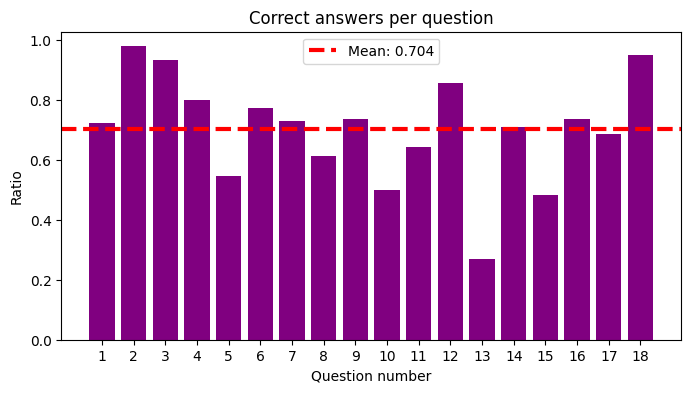

In [25]:
plt.figure(figsize=(8, 4))
plt.bar(x=xrange, height=correct_ratios, color='purple')
plt.axhline(mean, color='red', ls='--', lw=3)
plt.xticks(xrange)
plt.legend([f'Mean: {mean:.3f}'])
plt.title("Correct answers per question")
plt.xlabel("Question number")
plt.ylabel("Ratio")
plt.show()

In [26]:
classes_count = df_labels['correct'].value_counts()
print("Classes count:\n", classes_count, "\n")
print("Ratio:\n", classes_count / len(df_labels))
df_labels

Classes count:
 1    149252
0     62770
Name: correct, dtype: int64 

Ratio:
 1    0.703946
0    0.296054
Name: correct, dtype: float64


,session_id,correct,question
0,20090312431273200_q1,1,1
1,20090312433251036_q1,0,1
2,20090314121766812_q1,1,1
3,20090314363702160_q1,1,1
4,20090314441803444_q1,1,1
...,...,...,...
212017,22100215342220508_q18,1,18
212018,22100215460321130_q18,1,18
212019,22100217104993650_q18,1,18
212020,22100219442786200_q18,1,18


**Interpretation :**

The following are the ***insights*** found -

* It is quite a big dataframe (the train.csv file is more than 2GB large). It has more than **13** millions rows and a few features.
* About **70%** of the answers are correct and 30% are incorrect.
* The dataset is slightly **imbalanced**.
* The train and test dataframes have **similar ratios** of missing values which are good news.
* The labels only go up to level **18**, even though the questions extend up to level **22** in the training set.
* In the training set, we can observe that the mean is significantly **higher than the median**, which is due to the presence of outliers where the user remained on hover for an extended period.
